C:\Users\felipe\AppData\Local\Temp\ipykernel_17216\3547893114.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position', y='height_cm', data=mean_by_position, palette='Blues_d')
C:\Users\felipe\AppData\Local\Temp\ipykernel_17216\3547893114.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position', y='weight_kg', data=mean_by_position, palette='Greens_d')


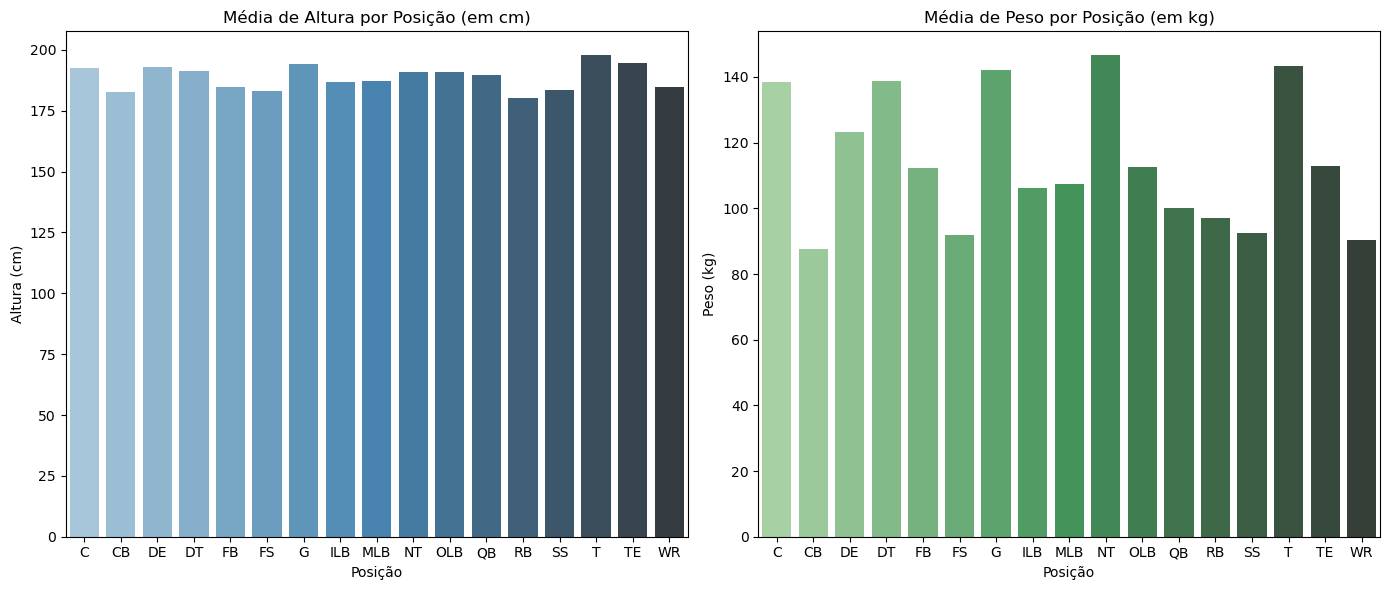

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import norm

# Lendo o arquivo CSV
df = pd.read_csv('players.csv')

# Função para converter altura de 'pés-polegadas' para cm
def height_to_cm(height):
    feet, inches = map(int, height.split('-'))
    return round(feet * 30.48 + inches * 2.54, 1)

# Função para converter peso de libras para kg
def weight_to_kg(weight):
    return round(weight * 0.453592, 1)

# Aplicando as conversões para cada linha
df['height_cm'] = df['height'].apply(height_to_cm)
df['weight_kg'] = df['weight'].apply(weight_to_kg)

# Agrupando por posição e calculando a média de altura e peso
mean_by_position = df.groupby('position')[['height_cm', 'weight_kg']].mean().reset_index()

# Criando gráficos de barras com Matplotlib e Seaborn
plt.figure(figsize=(14, 6))

# Gráfico de médias de altura por posição
plt.subplot(1, 2, 1)
sns.barplot(x='position', y='height_cm', data=mean_by_position, palette='Blues_d')
plt.title('Média de Altura por Posição (em cm)')
plt.xlabel('Posição')
plt.ylabel('Altura (cm)')

# Gráfico de médias de peso por posição
plt.subplot(1, 2, 2)
sns.barplot(x='position', y='weight_kg', data=mean_by_position, palette='Greens_d')
plt.title('Média de Peso por Posição (em kg)')
plt.xlabel('Posição')
plt.ylabel('Peso (kg)')

# Ajuste do layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()


In [2]:
# Calculando assimetria
skew_height = skew(df['height_cm'])
skew_weight = skew(df['weight_kg'])

print(f"Assimetria da altura: {skew_height:.2f}")
print(f"Assimetria do peso: {skew_weight:.2f}")

Assimetria da altura: -0.26
Assimetria do peso: 0.44


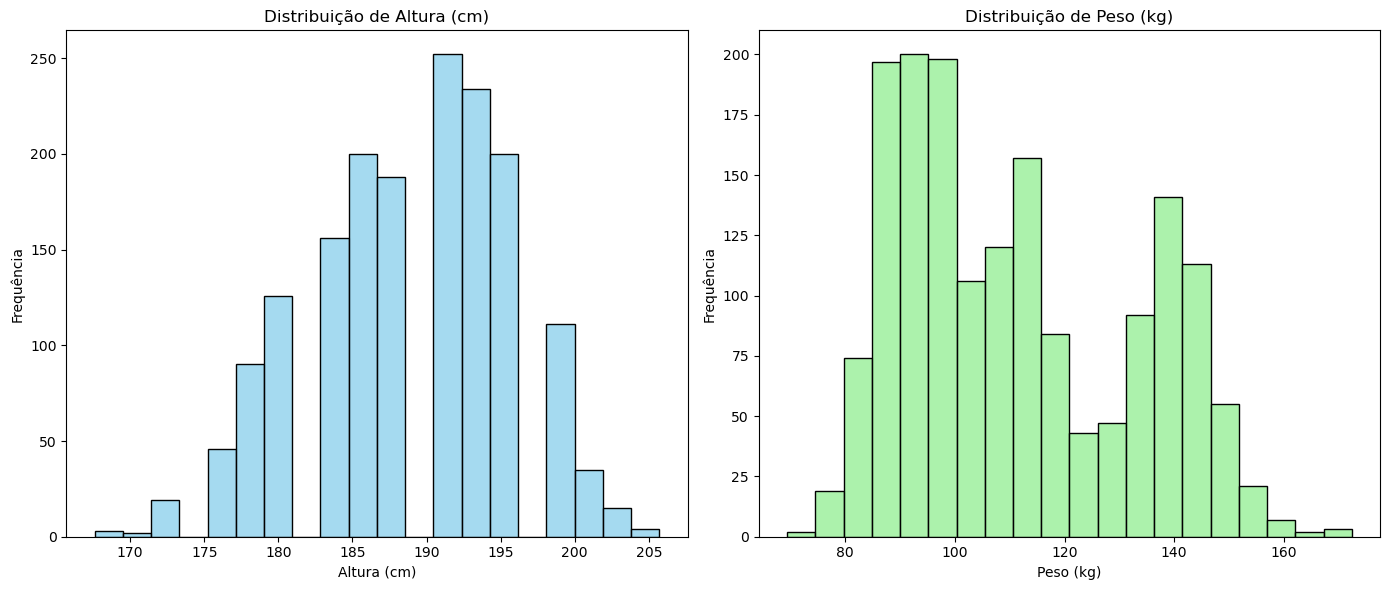

In [3]:
# Histograma para altura
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['height_cm'], kde=False, bins=20, color='skyblue')
plt.title('Distribuição de Altura (cm)')
plt.xlabel('Altura (cm)')
plt.ylabel('Frequência')

# Histograma para peso
plt.subplot(1, 2, 2)
sns.histplot(df['weight_kg'], kde=False, bins=20, color='lightgreen')
plt.title('Distribuição de Peso (kg)')
plt.xlabel('Peso (kg)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


In [4]:
# Calculando curtose
kurt_height = kurtosis(df['height_cm'])
kurt_weight = kurtosis(df['weight_kg'])

print(f"Curtose da altura: {kurt_height:.2f}")
print(f"Curtose do peso: {kurt_weight:.2f}")

Curtose da altura: -0.46
Curtose do peso: -1.03


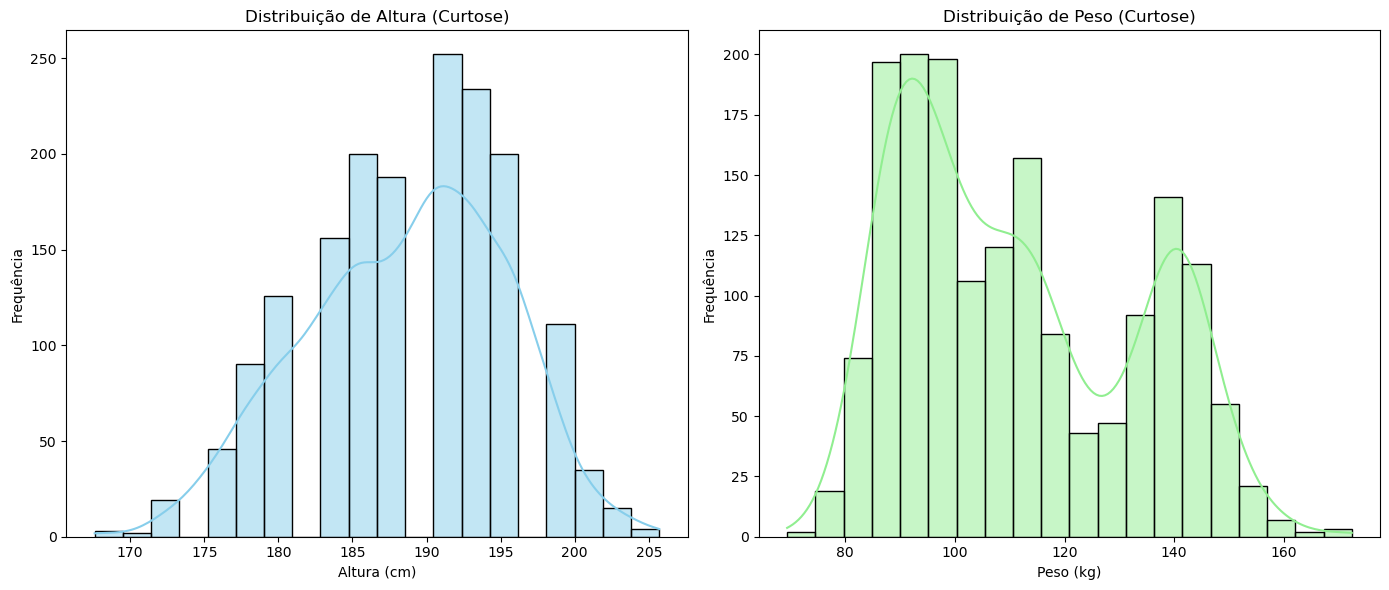

In [5]:
# Histograma com linha de densidade para altura e peso
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['height_cm'], kde=True, bins=20, color='skyblue')
plt.title('Distribuição de Altura (Curtose)')
plt.xlabel('Altura (cm)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df['weight_kg'], kde=True, bins=20, color='lightgreen')
plt.title('Distribuição de Peso (Curtose)')
plt.xlabel('Peso (kg)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


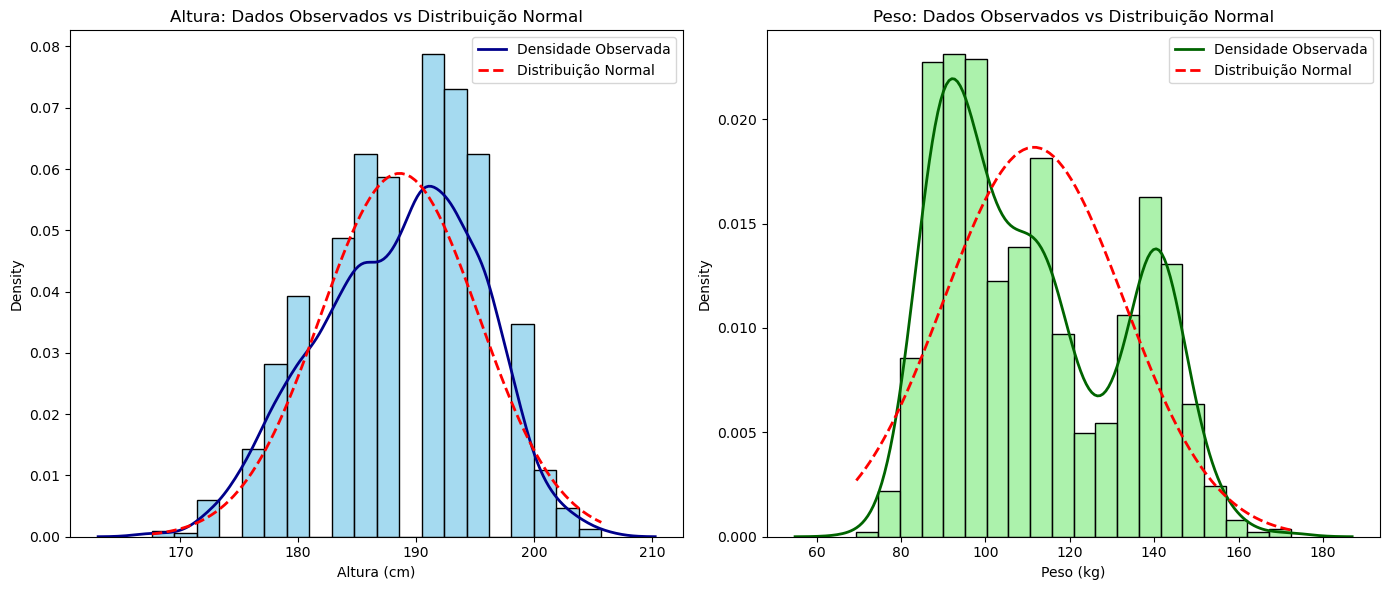

In [6]:
# Dados de exemplo e linha normal
mean_height, std_height = df['height_cm'].mean(), df['height_cm'].std()
mean_weight, std_weight = df['weight_kg'].mean(), df['weight_kg'].std()

x_height = np.linspace(df['height_cm'].min(), df['height_cm'].max(), 100)
x_weight = np.linspace(df['weight_kg'].min(), df['weight_kg'].max(), 100)

plt.figure(figsize=(14, 6))

# Gráfico para altura
plt.subplot(1, 2, 1)
sns.histplot(df['height_cm'], bins=20, color='skyblue', stat='density')  # Histograma
sns.kdeplot(df['height_cm'], color='darkblue', linewidth=2, label='Densidade Observada')  # Linha de densidade empírica
plt.plot(x_height, norm.pdf(x_height, mean_height, std_height), color='red', linestyle='--', linewidth=2,
         label='Distribuição Normal')  # Linha da normal
plt.title('Altura: Dados Observados vs Distribuição Normal')
plt.xlabel('Altura (cm)')
plt.legend()

# Gráfico para peso
plt.subplot(1, 2, 2)
sns.histplot(df['weight_kg'], bins=20, color='lightgreen', stat='density')  # Histograma
sns.kdeplot(df['weight_kg'], color='darkgreen', linewidth=2, label='Densidade Observada')  # Linha de densidade empírica
plt.plot(x_weight, norm.pdf(x_weight, mean_weight, std_weight), color='red', linestyle='--', linewidth=2,
         label='Distribuição Normal')  # Linha da normal
plt.title('Peso: Dados Observados vs Distribuição Normal')
plt.xlabel('Peso (kg)')
plt.legend()

plt.tight_layout()
plt.show()

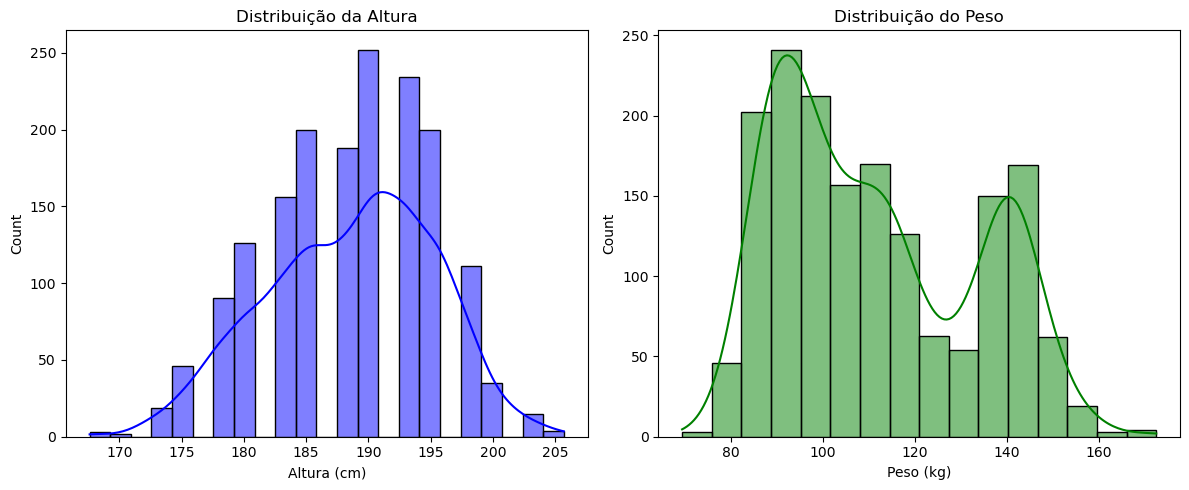

In [7]:
plt.figure(figsize=(12, 5))

# Histograma da altura
plt.subplot(1, 2, 1)
sns.histplot(df['height_cm'], kde=True, color='blue')
plt.title('Distribuição da Altura')
plt.xlabel('Altura (cm)')

# Histograma do peso
plt.subplot(1, 2, 2)
sns.histplot(df['weight_kg'], kde=True, color='green')
plt.title('Distribuição do Peso')
plt.xlabel('Peso (kg)')

plt.tight_layout()
plt.show()

C:\Users\felipe\AppData\Local\Temp\ipykernel_17216\164144735.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['height_cm'], shade=True, color='blue')
C:\Users\felipe\AppData\Local\Temp\ipykernel_17216\164144735.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['weight_kg'], shade=True, color='green')


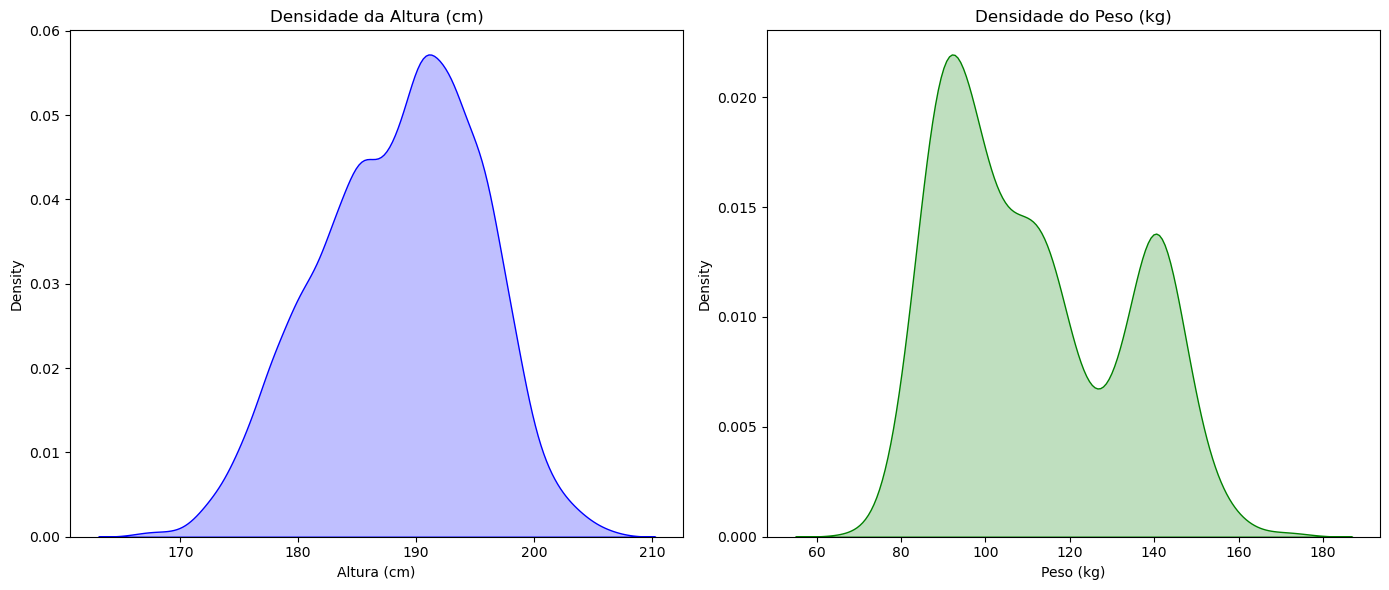

In [8]:
# Gráfico de densidade para altura e peso
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(df['height_cm'], shade=True, color='blue')
plt.title('Densidade da Altura (cm)')
plt.xlabel('Altura (cm)')

plt.subplot(1, 2, 2)
sns.kdeplot(df['weight_kg'], shade=True, color='green')
plt.title('Densidade do Peso (kg)')
plt.xlabel('Peso (kg)')

plt.tight_layout()
plt.show()


C:\Users\felipe\AppData\Local\Temp\ipykernel_17216\878879149.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='position', y='height_cm', data=df, palette='Blues')
C:\Users\felipe\AppData\Local\Temp\ipykernel_17216\878879149.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='position', y='weight_kg', data=df, palette='Greens')


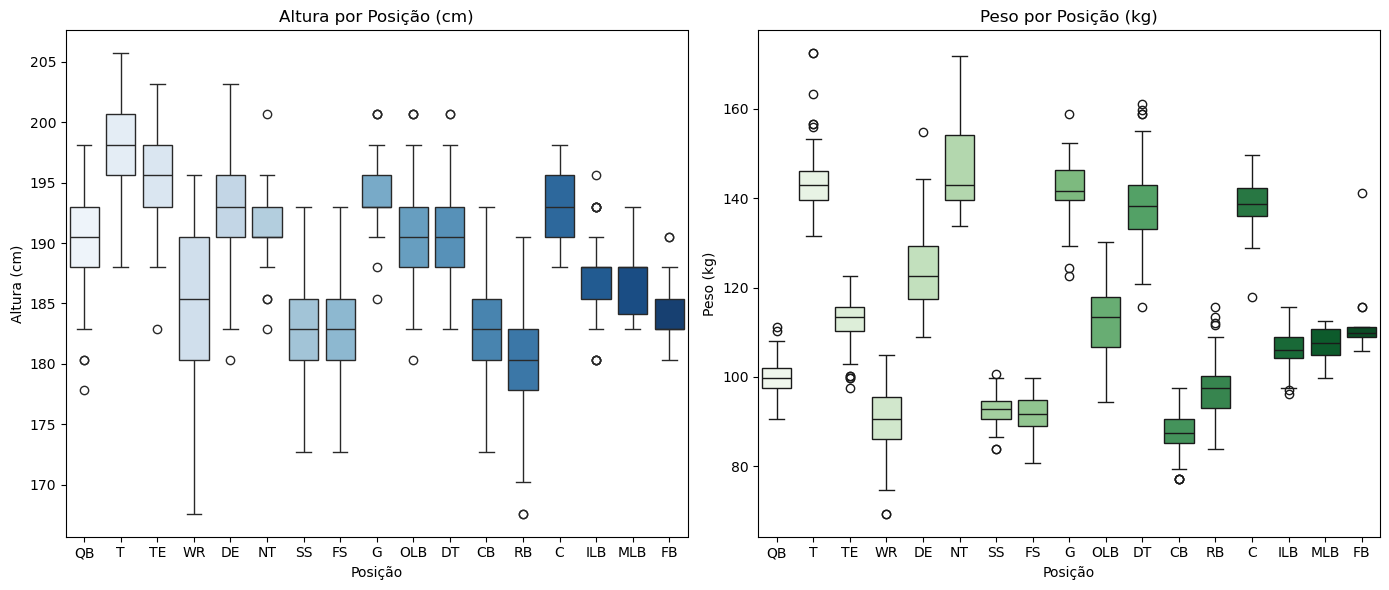

In [9]:
# Boxplot para altura e peso por posição
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='position', y='height_cm', data=df, palette='Blues')
plt.title('Altura por Posição (cm)')
plt.xlabel('Posição')
plt.ylabel('Altura (cm)')

plt.subplot(1, 2, 2)
sns.boxplot(x='position', y='weight_kg', data=df, palette='Greens')
plt.title('Peso por Posição (kg)')
plt.xlabel('Posição')
plt.ylabel('Peso (kg)')

plt.tight_layout()
plt.show()


In [10]:
# Coeficiente de correlação entre altura e peso
corr, _ = pearsonr(df['height_cm'], df['weight_kg'])
print(f"Coeficiente de Pearson entre altura e peso: {corr:.2f}")

Coeficiente de Pearson entre altura e peso: 0.70


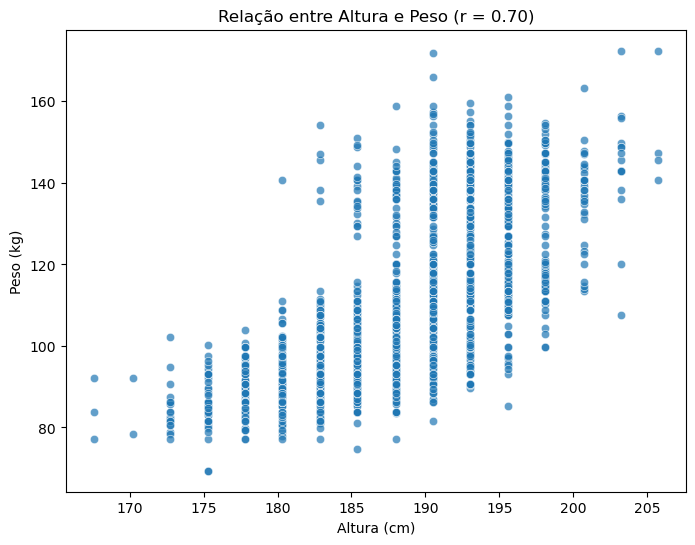

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height_cm', y='weight_kg', data=df, alpha=0.7)
plt.title(f'Relação entre Altura e Peso (r = {corr:.2f})')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

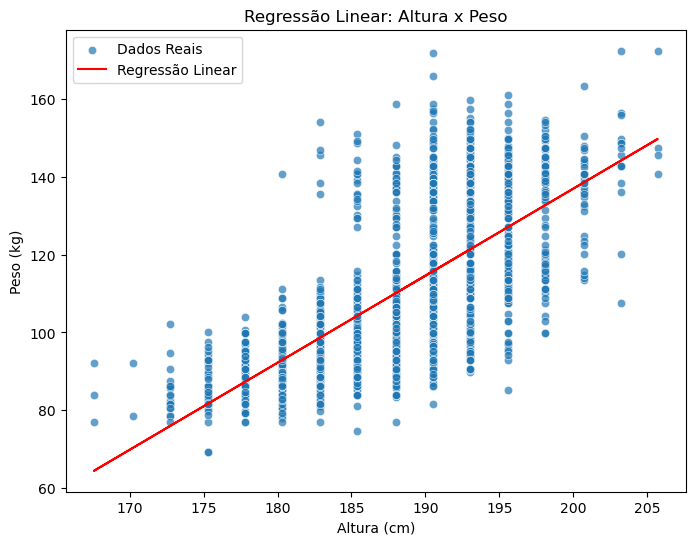

Coeficiente angular (slope): 2.24
Intercepto: -310.57


In [12]:
# Modelo de regressão
X = df['height_cm'].values.reshape(-1, 1)
y = df['weight_kg'].values
model = LinearRegression()
model.fit(X, y)

# Predições
predictions = model.predict(X)

# Visualização
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height_cm', y='weight_kg', data=df, alpha=0.7, label='Dados Reais')
plt.plot(df['height_cm'], predictions, color='red', label='Regressão Linear')
plt.title('Regressão Linear: Altura x Peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.show()

print(f"Coeficiente angular (slope): {model.coef_[0]:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")

In [13]:
# Função para calcular assimetria e curtose por posição
def calculate_skew_kurt(data, column, groupby_col):
    results = {}
    for position, group in data.groupby(groupby_col):
        skewness = skew(group[column])
        kurt = kurtosis(group[column])
        results[position] = {'Assimetria': skewness, 'Curtose': kurt}
    return pd.DataFrame.from_dict(results, orient='index')

# Calcular para altura
skew_kurt_height = calculate_skew_kurt(df, 'height_cm', 'position')
print("Medidas de Assimetria e Curtose para Altura:")
print(skew_kurt_height)

# Calcular para peso
skew_kurt_weight = calculate_skew_kurt(df, 'weight_kg', 'position')
print("\nMedidas de Assimetria e Curtose para Peso:")
print(skew_kurt_weight)

Medidas de Assimetria e Curtose para Altura:
     Assimetria   Curtose
C      0.107306 -0.701695
CB     0.053404 -0.445274
DE    -0.043599  0.662914
DT    -0.025622 -0.322840
FB     0.583571 -0.669305
FS     0.039677  0.037806
G     -0.052694 -0.234524
ILB    0.077282 -0.307294
MLB    0.107979 -0.761308
NT     0.247367  1.554112
OLB   -0.108121 -0.356443
QB    -0.151219 -0.036317
RB    -0.029508  0.205007
SS     0.111577  0.691936
T      0.054452  0.309890
TE    -0.209551  0.384072
WR    -0.342874 -0.690318

Medidas de Assimetria e Curtose para Peso:
     Assimetria   Curtose
C     -0.988694  3.020958
CB    -0.118043  0.180537
DE     0.705432  0.812873
DT     0.338846  0.350617
FB     2.572861  5.737766
FS    -0.239562  0.110904
G     -0.413382  1.487140
ILB   -0.108283  0.173799
MLB   -0.426968 -0.493792
NT     0.790736  0.045964
OLB   -0.053505 -0.376517
QB     0.366090 -0.171811
RB     0.289379  0.540622
SS    -0.079850  0.092566
T      1.765698  5.734319
TE    -0.700788  0.666818
W

In [14]:
# Função para calcular coeficiente de Pearson por posição
def calculate_pearson(data, col1, col2, groupby_col):
    results = {}
    for position, group in data.groupby(groupby_col):
        corr, _ = pearsonr(group[col1], group[col2])
        results[position] = {'Coeficiente de Pearson': corr}
    return pd.DataFrame.from_dict(results, orient='index')

# Calcular coeficiente de Pearson entre altura e peso
pearson_corr = calculate_pearson(df, 'height_cm', 'weight_kg', 'position')
print("Coeficiente de Pearson (Altura x Peso) por Posição:")
print(pearson_corr)

Coeficiente de Pearson (Altura x Peso) por Posição:
     Coeficiente de Pearson
C                  0.016459
CB                 0.472531
DE                 0.189217
DT                 0.048703
FB                 0.606961
FS                 0.495598
G                 -0.038962
ILB                0.155764
MLB                0.169335
NT                -0.062505
OLB                0.635537
QB                 0.565036
RB                 0.586366
SS                 0.378309
T                  0.350006
TE                 0.268562
WR                 0.705499


In [15]:
# Função para aplicar regressão linear por posição
def regression_by_position(data, x_col, y_col, groupby_col):
    regression_results = {}
    for position, group in data.groupby(groupby_col):
        X = group[x_col].values.reshape(-1, 1)
        y = group[y_col].values
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0]
        intercept = model.intercept_
        regression_results[position] = {
            'Slope (Coeficiente Angular)': slope,
            'Intercepto': intercept
        }
    return pd.DataFrame.from_dict(regression_results, orient='index')

# Aplicar regressão entre altura e peso por posição
regression_results = regression_by_position(df, 'height_cm', 'weight_kg', 'position')
print("Resultados da Regressão Linear (Altura x Peso) por Posição:")
print(regression_results)

Resultados da Regressão Linear (Altura x Peso) por Posição:
     Slope (Coeficiente Angular)  Intercepto
C                       0.030640  132.677181
CB                      0.435646    8.095443
DE                      0.402152   45.683175
DT                      0.103024  118.996833
FB                      1.665998 -195.276460
FS                      0.460257    7.579749
G                      -0.076034  157.039555
ILB                     0.193438   70.145771
MLB                     0.195595   70.740295
NT                     -0.177097  180.383189
OLB                     1.101945  -97.844348
QB                      0.567515   -7.676840
RB                      0.789605  -45.110994
SS                      0.373619   24.043861
T                       0.644779   15.904755
TE                      0.393275   36.323836
WR                      0.776223  -53.005746


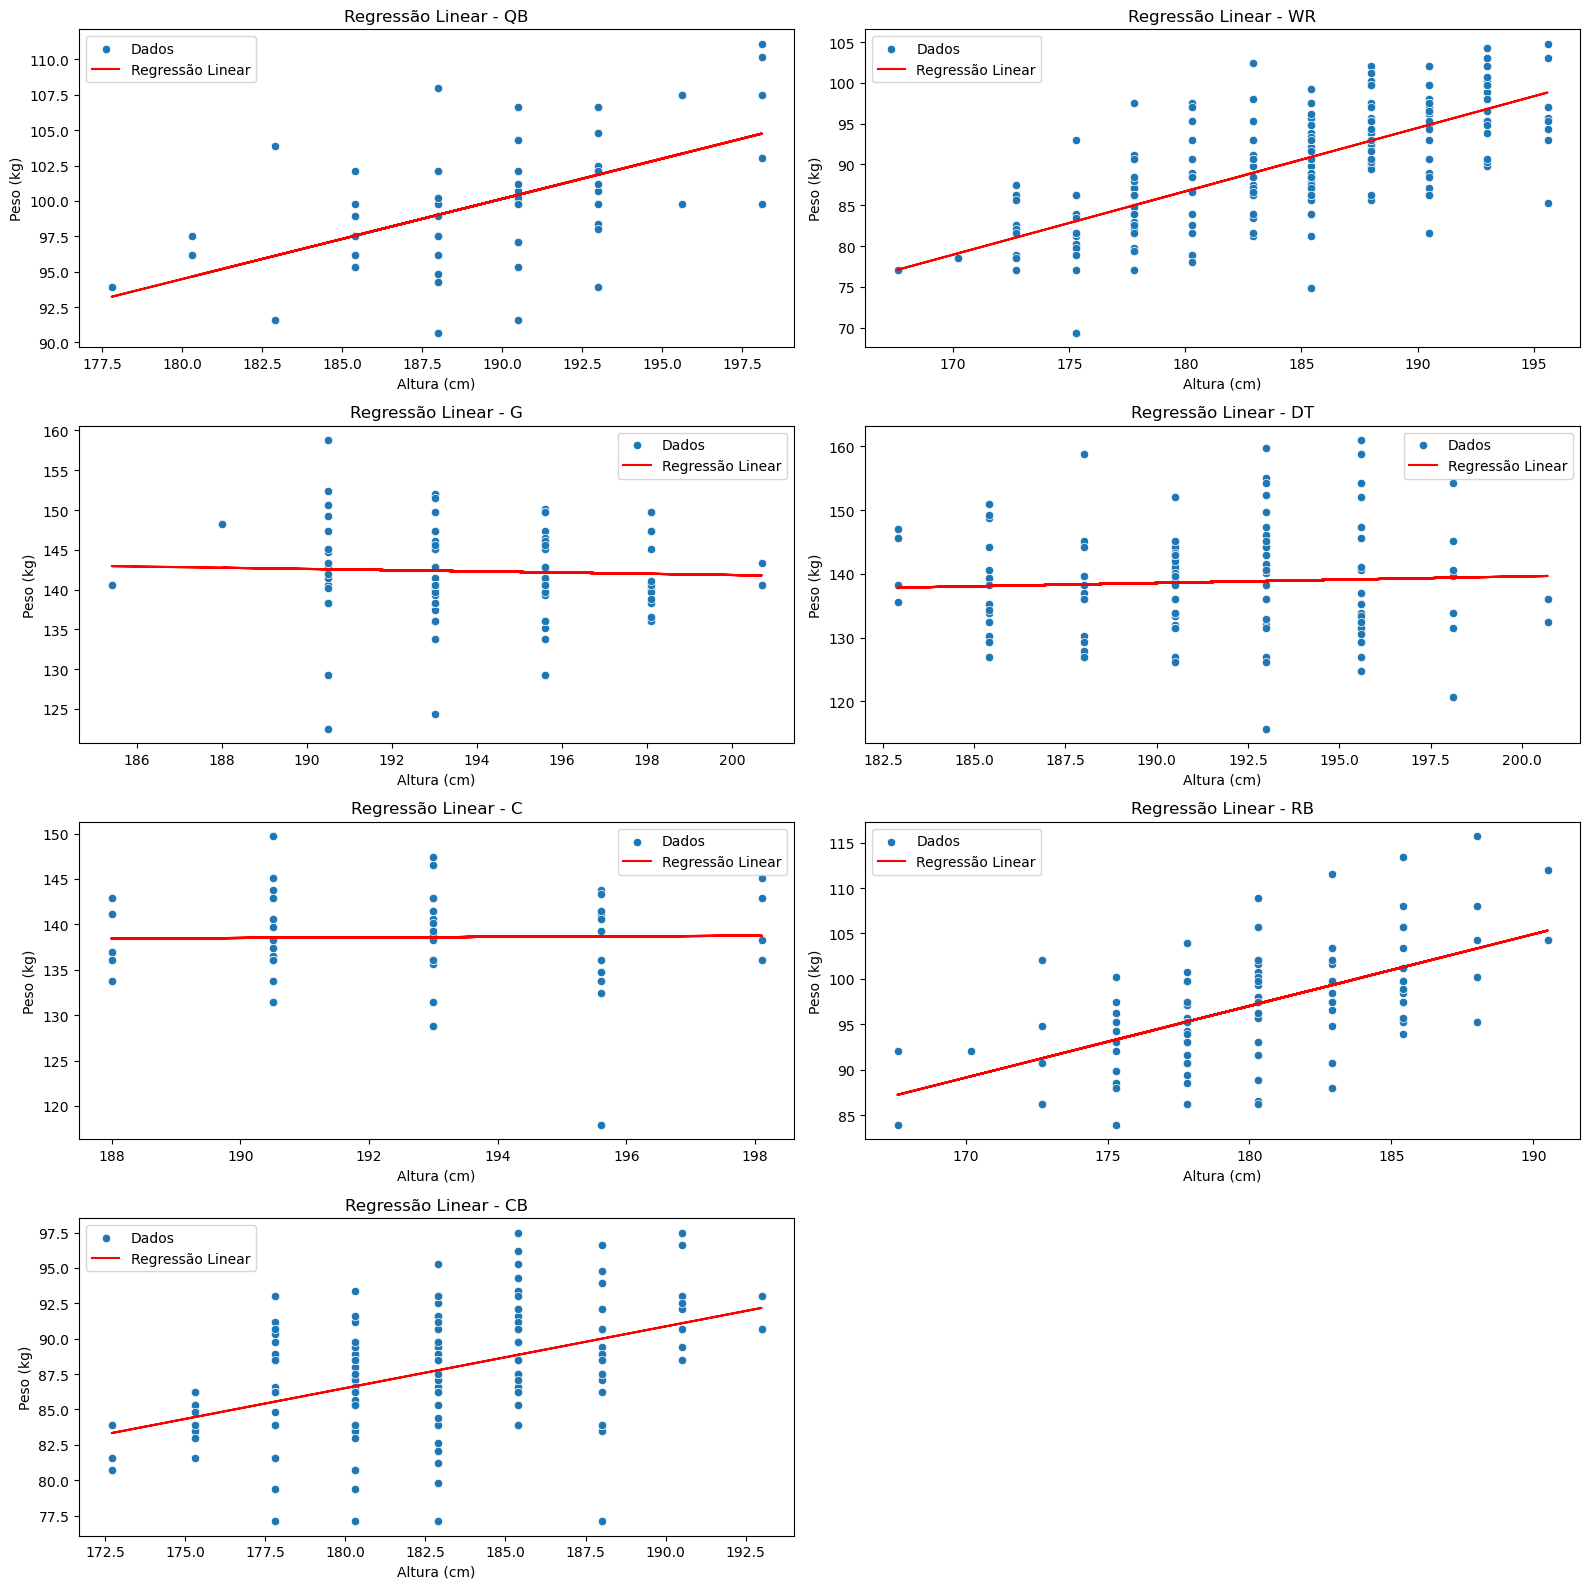

In [16]:
# Posições específicas
positions_to_plot = ['QB', 'WR', 'G', 'DT', 'C', 'RB', 'CB']
num_positions = len(positions_to_plot)

# Ajustar o número de linhas dinamicamente
cols = 2  # Número fixo de colunas
rows = (num_positions + cols - 1) // cols  # Calcula o número de linhas necessário

plt.figure(figsize=(16, rows * 4))  # Ajusta o tamanho da figura
for i, position in enumerate(positions_to_plot, 1):
    plt.subplot(rows, cols, i)
    group = df[df['position'] == position]
    X = group['height_cm'].values.reshape(-1, 1)
    y = group['weight_kg'].values
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    sns.scatterplot(x='height_cm', y='weight_kg', data=group, label='Dados')
    plt.plot(group['height_cm'], predictions, color='red', label='Regressão Linear')
    plt.title(f'Regressão Linear - {position}')
    plt.xlabel('Altura (cm)')
    plt.ylabel('Peso (kg)')
    plt.legend()

plt.tight_layout()
plt.show()


In [17]:
display(mean_by_position)

,position,height_cm,weight_kg
0,C,192.710909,138.581818
1,CB,182.572775,87.632461
2,DE,192.914400,123.264000
3,DT,191.256693,138.700787
4,FB,184.638462,112.330769
5,FS,183.169231,91.884615
6,G,194.264078,142.268932
7,ILB,187.008602,106.320430
8,MLB,187.054545,107.327273
9,NT,190.906452,146.574194


In [18]:
ordenado_por_altura = mean_by_position.sort_values(by='height_cm', ascending=False)

In [19]:
display(ordenado_por_altura)

,position,height_cm,weight_kg
14,T,197.746281,143.407438
15,TE,194.557600,112.838400
6,G,194.264078,142.268932
2,DE,192.914400,123.264000
0,C,192.710909,138.581818
3,DT,191.256693,138.700787
9,NT,190.906452,146.574194
10,OLB,190.846429,112.457857
11,QB,189.704918,99.983607
8,MLB,187.054545,107.327273


In [20]:
ordenado_por_peso = mean_by_position.sort_values(by='weight_kg', ascending=False)

In [21]:
display(ordenado_por_peso)

,position,height_cm,weight_kg
9,NT,190.906452,146.574194
14,T,197.746281,143.407438
6,G,194.264078,142.268932
3,DT,191.256693,138.700787
0,C,192.710909,138.581818
2,DE,192.914400,123.264000
15,TE,194.557600,112.838400
10,OLB,190.846429,112.457857
4,FB,184.638462,112.330769
8,MLB,187.054545,107.327273


In [22]:
desvio_padrao_por_posicao = df.groupby('position')[['height_cm', 'weight_kg']].std().reset_index()

In [23]:
display(desvio_padrao_por_posicao)

,position,height_cm,weight_kg
0,C,2.803151,5.218276
1,CB,4.333504,3.995233
2,DE,3.745701,7.960896
3,DT,3.879936,8.207377
4,FB,3.348019,9.189703
5,FS,4.214271,3.913748
6,G,2.935611,5.728858
7,ILB,3.222565,4.001998
8,MLB,3.258946,3.764330
9,NT,3.345239,9.478114


In [24]:
desvio_altura_ordenado = desvio_padrao_por_posicao.sort_values(by='height_cm', ascending=False)

In [25]:
display(desvio_altura_ordenado)

,position,height_cm,weight_kg
16,WR,6.287470,6.917772
11,QB,4.526788,4.546654
12,RB,4.425542,5.959476
1,CB,4.333504,3.995233
5,FS,4.214271,3.913748
10,OLB,4.210836,7.301080
3,DT,3.879936,8.207377
2,DE,3.745701,7.960896
13,SS,3.567623,3.523390
14,T,3.494425,6.437419


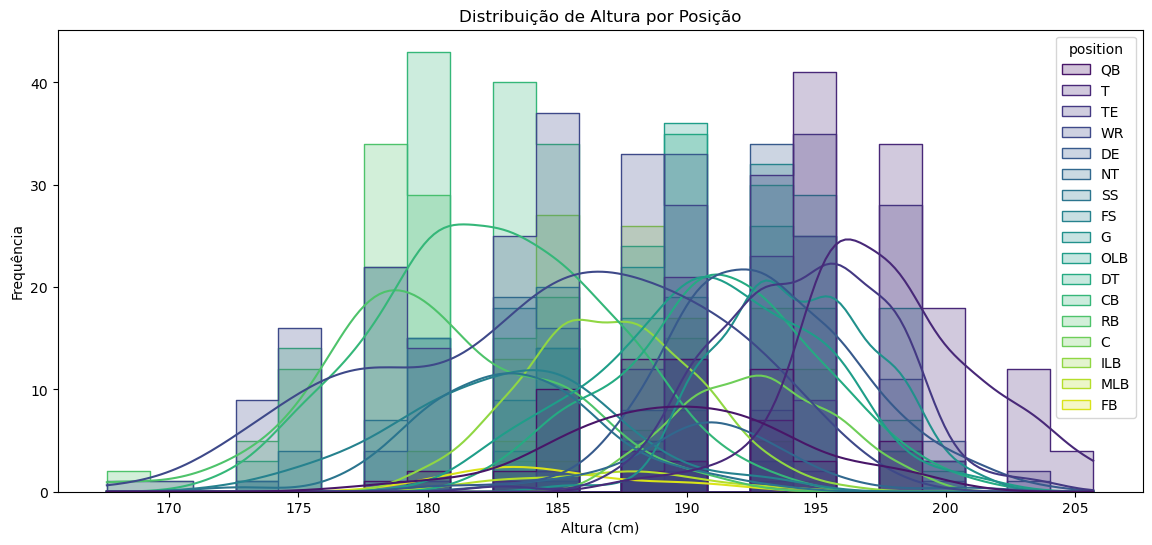

In [26]:
plt.figure(figsize=(14, 6))
sns.histplot(df, x='height_cm', hue='position', kde=True, palette='viridis', element='step')
plt.title('Distribuição de Altura por Posição')
plt.xlabel('Altura (cm)')
plt.ylabel('Frequência')
plt.show()

C:\Users\felipe\AppData\Local\Temp\ipykernel_17216\886505061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='position', y='height_cm', data=df, palette='coolwarm')


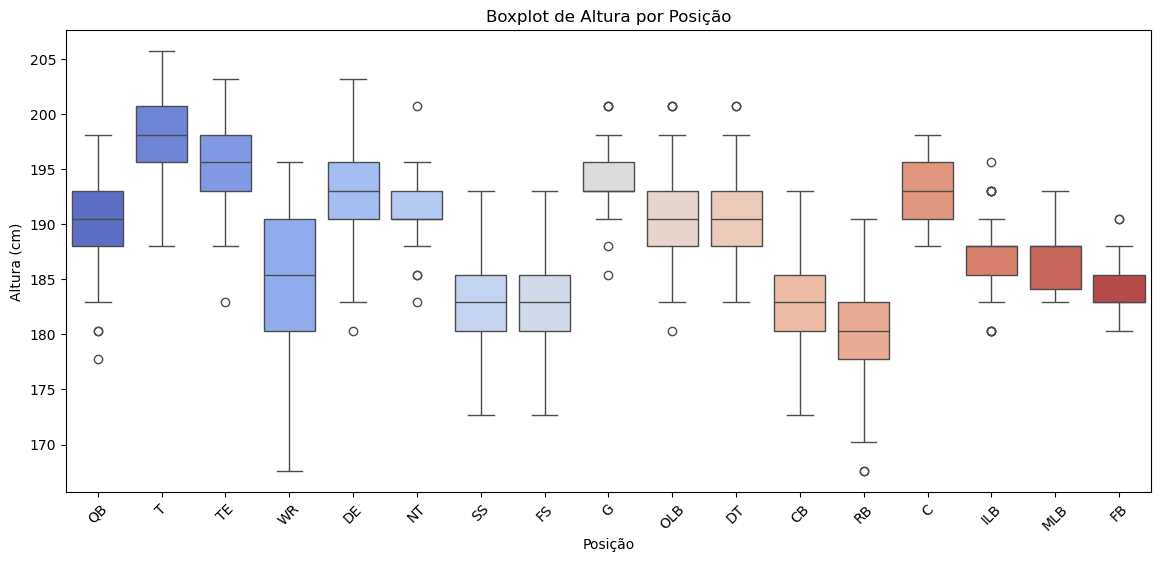

In [27]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='position', y='height_cm', data=df, palette='coolwarm')
plt.title('Boxplot de Altura por Posição')
plt.xlabel('Posição')
plt.ylabel('Altura (cm)')
plt.xticks(rotation=45)
plt.show()


C:\Users\felipe\AppData\Local\Temp\ipykernel_17216\3012156152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position', y='height_cm', data=desvio_padrao_por_posicao, palette='Spectral')


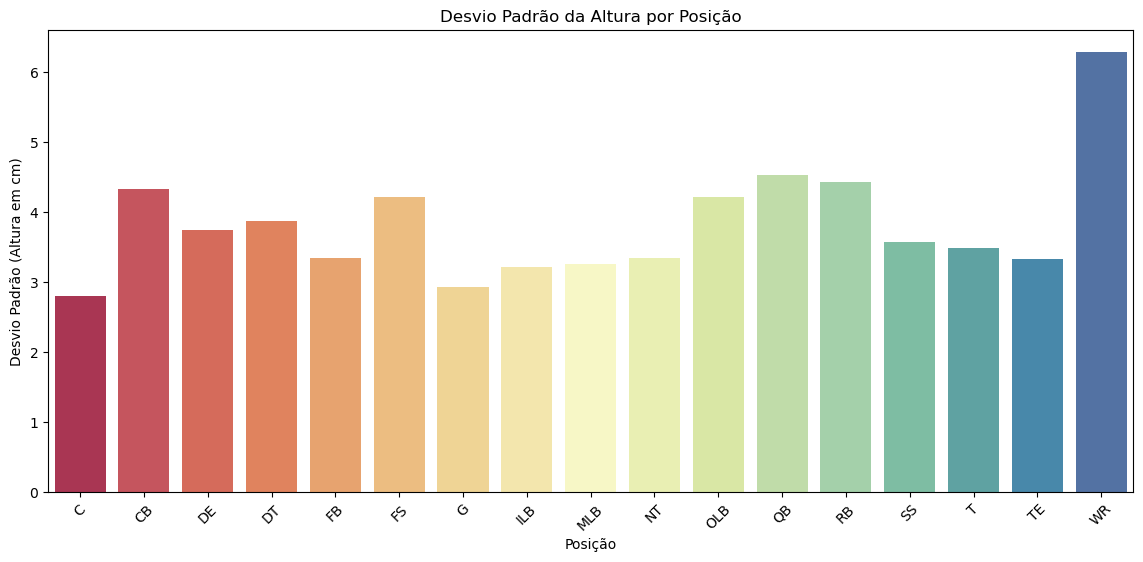

In [28]:
plt.figure(figsize=(14, 6))
sns.barplot(x='position', y='height_cm', data=desvio_padrao_por_posicao, palette='Spectral')
plt.title('Desvio Padrão da Altura por Posição')
plt.xlabel('Posição')
plt.ylabel('Desvio Padrão (Altura em cm)')
plt.xticks(rotation=45)
plt.show()


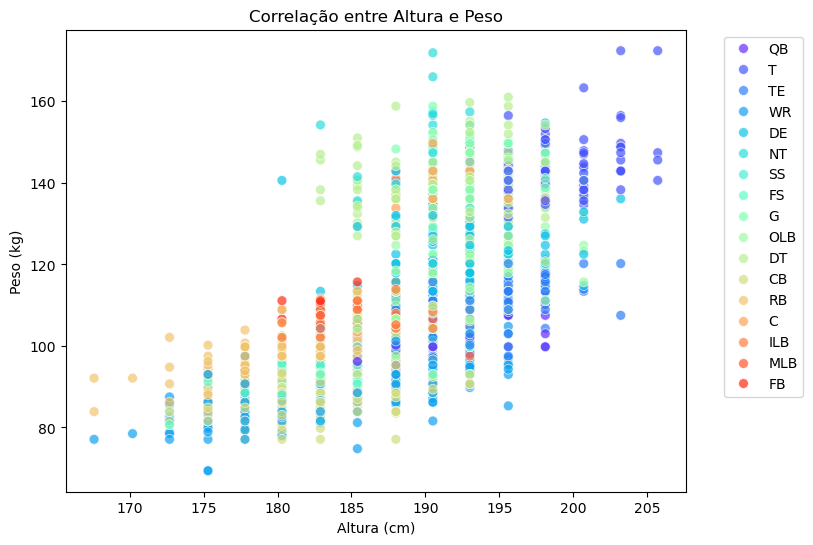

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height_cm', y='weight_kg', data=df, hue='position', palette='rainbow', s=50, alpha=0.7)
plt.title('Correlação entre Altura e Peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


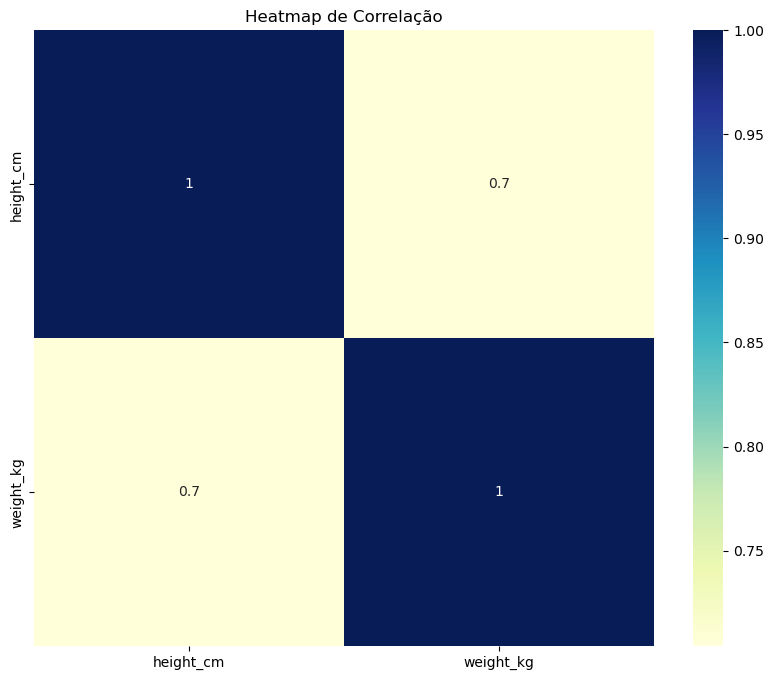

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['height_cm', 'weight_kg']].corr(), annot=True, cmap='YlGnBu')
plt.title('Heatmap de Correlação')
plt.show()


C:\Users\felipe\AppData\Local\Temp\ipykernel_17216\30454633.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='quarterback', x='weighted_avg_points', data=top_10_qbs_weighted, palette='viridis')


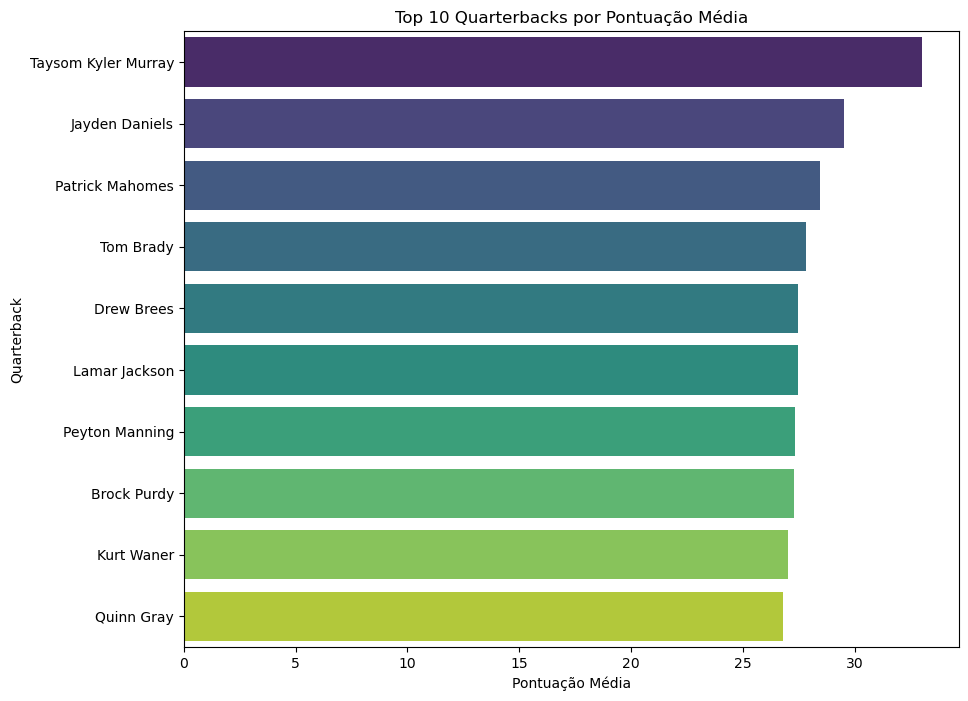

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('games.csv')

# Selecionar colunas relevantes
df_qb = df[['away_qb_name', 'home_qb_name', 'away_score', 'home_score']]

# Renomear colunas para facilitar o uso
df_qb = df_qb.rename(columns={
    'away_qb_name': 'quarterback_away',
    'home_qb_name': 'quarterback_home',
    'away_score': 'score_away',
    'home_score': 'score_home'
})

# Transformar o DataFrame para obter pontuações de cada quarterback (casa e fora)
away_df = df_qb[['quarterback_away', 'score_away']].rename(columns={
    'quarterback_away': 'quarterback', 'score_away': 'score'
})
home_df = df_qb[['quarterback_home', 'score_home']].rename(columns={
    'quarterback_home': 'quarterback', 'score_home': 'score'
})

# Concatenar os DataFrames para ter uma tabela única de pontuação por quarterback
qb_scores = pd.concat([away_df, home_df])

# Calcular a pontuação total e o número de jogos para cada quarterback
qb_stats = qb_scores.groupby('quarterback').agg(
    total_points=('score', 'sum'), 
    games_played=('score', 'size')
).reset_index()

# Calcular a média ponderada de pontos, ajustada pela quantidade de jogos
qb_stats['weighted_avg_points'] = qb_stats['total_points'] / qb_stats['games_played']

# Ordenar e selecionar os 10 quarterbacks mais eficientes em termos de pontuação ajustada
top_10_qbs_weighted = qb_stats.sort_values(by='weighted_avg_points', ascending=False).head(10)

# Visualizar o ranking dos 10 quarterbacks em média ponderada de pontos
plt.figure(figsize=(10, 8))
sns.barplot(y='quarterback', x='weighted_avg_points', data=top_10_qbs_weighted, palette='viridis')
plt.title('Top 10 Quarterbacks por Pontuação Média')
plt.xlabel('Pontuação Média')
plt.ylabel('Quarterback')
plt.show()


In [32]:
skew_points = skew(qb_stats['weighted_avg_points'])
print(f"Assimetria da pontuação média ponderada: {skew_points:.2f}")

Assimetria da pontuação média ponderada: -0.75


In [33]:
kurt_points = kurtosis(qb_stats['weighted_avg_points'])
print(f"Curtose da pontuação média ponderada: {kurt_points:.2f}")

Curtose da pontuação média ponderada: 1.07


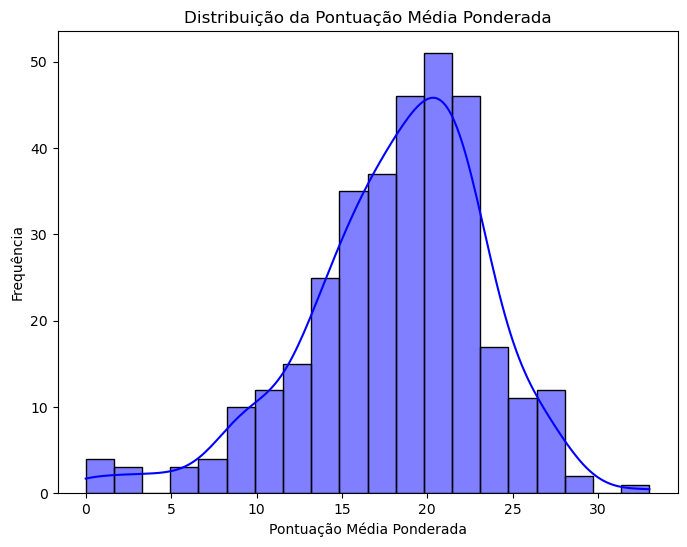

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(qb_stats['weighted_avg_points'], kde=True, color='blue', bins=20)
plt.title('Distribuição da Pontuação Média Ponderada')
plt.xlabel('Pontuação Média Ponderada')
plt.ylabel('Frequência')
plt.show()

In [35]:
corr, _ = pearsonr(qb_stats['games_played'], qb_stats['weighted_avg_points'])
print(f"Coeficiente de Pearson entre jogos e pontuação média ponderada: {corr:.2f}")

Coeficiente de Pearson entre jogos e pontuação média ponderada: 0.52


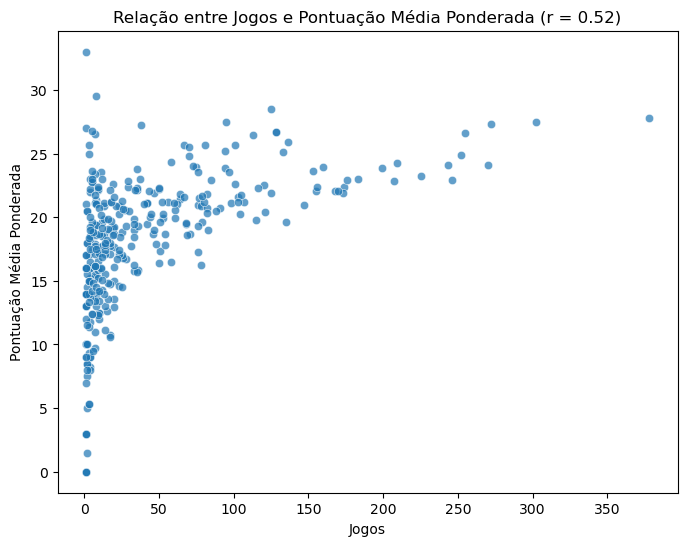

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='games_played', y='weighted_avg_points', data=qb_stats, alpha=0.7)
plt.title(f'Relação entre Jogos e Pontuação Média Ponderada (r = {corr:.2f})')
plt.xlabel('Jogos')
plt.ylabel('Pontuação Média Ponderada')
plt.show()

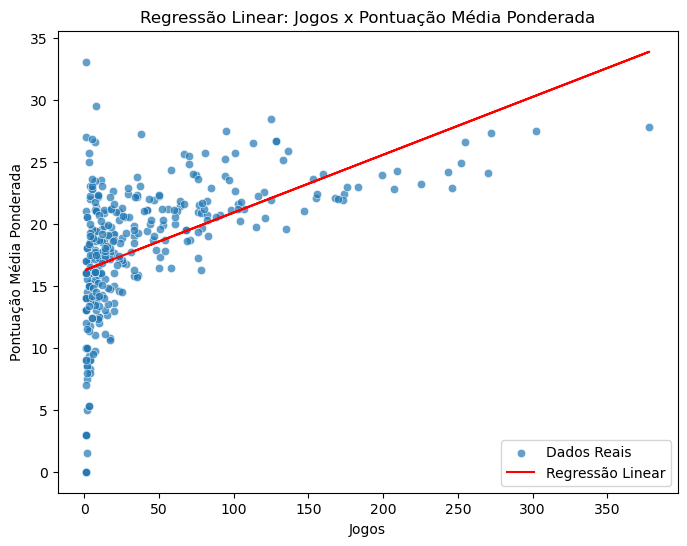

Coeficiente angular (slope): 0.05
Intercepto: 16.23


In [37]:
# Modelo de regressão
X = qb_stats['games_played'].values.reshape(-1, 1)
y = qb_stats['weighted_avg_points'].values
model = LinearRegression()
model.fit(X, y)

# Predições
predictions = model.predict(X)

# Visualização
plt.figure(figsize=(8, 6))
sns.scatterplot(x='games_played', y='weighted_avg_points', data=qb_stats, alpha=0.7, label='Dados Reais')
plt.plot(qb_stats['games_played'], predictions, color='red', label='Regressão Linear')
plt.title('Regressão Linear: Jogos x Pontuação Média Ponderada')
plt.xlabel('Jogos')
plt.ylabel('Pontuação Média Ponderada')
plt.legend()
plt.show()

print(f"Coeficiente angular (slope): {model.coef_[0]:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")